# Test de filtres passe bande

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
from scipy import signal
import scipy.signal
from matplotlib.pyplot import *

C:\Users\anais\AppData\Local\Temp\ipykernel_23952\3825013837.py:2: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  b2 = scipy.signal.firwin(numtaps = 2*P+1, cutoff = [0.1, 0.3], pass_zero = False, window = 'hann', nyq = 0.5)


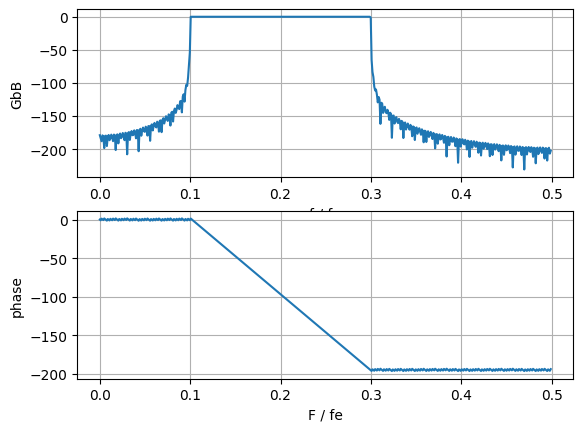

In [2]:
P = 2205
b2 = scipy.signal.firwin(numtaps = 2*P+1, cutoff = [0.1, 0.3], pass_zero = False, window = 'hann', nyq = 0.5)

w, h =  scipy.signal.freqz(b2)

figure()
subplot(211)
plot(w/(2*np.pi), 20*np.log10(np.absolute(h)))
xlabel("f / fe")
ylabel("GbB")
grid()

subplot(212)
plot(w/(2*np.pi), np.unwrap(np.angle(h)))
xlabel("F / fe")
ylabel("phase")
grid()

In [3]:
low_cut = 20000
high_cut = 22050
Fe = 44100

def butter_bandpass(low_cut, hight_cut, Fe, ordre = 5):
    # Filtre passe bande

    # Arguments :
    #   - coupe-bas (float) :   la plus basse fréquence coupée
    #   - coupe-haut (float) :  la fréquence la plus haute
    #   - Fe    (float) :       La fréquence d'échantillonnage
    #   - ordre (int) :         L'ordre du filtre, par défaut

    # Calculer Nyquist fréquence
    nyq = 0.5 * Fe

    # Création du filtre 
    low = low_cut / nyq
    high = high_cut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype = 'band')

    # Retrouner les coefficients de filtres : numérateur et dénominateur
    return b, a